In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/deepfashion2-original-with-dataframes/DeepFashion2/img_info_dataframes'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/data/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import shutil
import os

# Dataset Overview

I am constructing a dataset with 11 classes:
1. Dress
2. Trousers
3. Shirt
4. Shoes
5. Shorts
6. T-Shirt
7. Skirt
8. Top
9. Suit
10. Summerwear
11. Jeans <br>
This will be done by combining data from 5 datasets.The data will be divided into files with each category having a seperate file.

# Dataset Preparation

In [3]:
types = ["dress", "trousers", "shirt", "shoes", "shorts", "t-shirt", 
              "skirt", "top", "suit", "summerwear", "jeans"]

## First get data from DeepFashion2

In [4]:
deep_fashion_train = pd.read_csv('/kaggle/input/deepfashion2-original-with-dataframes/DeepFashion2/img_info_dataframes/train.csv')

In [5]:
deep_fashion_test = pd.read_csv('/kaggle/input/deepfashion2-original-with-dataframes/DeepFashion2/img_info_dataframes/test.csv')

In [6]:
deep_fashion_val = pd.read_csv('/kaggle/input/deepfashion2-original-with-dataframes/DeepFashion2/img_info_dataframes/validation.csv')

In [7]:
deep_fashion_train.columns

Index(['path', 'segmentation', 'landmarks', 'b_box', 'category_id',
       'category_name', 'scale', 'viewpoint', 'occlusion', 'zoom_in',
       'img_height', 'img_width'],
      dtype='object')

In [8]:
deep_fashion_test.columns

Index(['path', 'img_height', 'img_width'], dtype='object')

In [9]:
deep_fashion_val.columns

Index(['path', 'segmentation', 'landmarks', 'b_box', 'category_id',
       'category_name', 'scale', 'viewpoint', 'occlusion', 'zoom_in',
       'img_height', 'img_width'],
      dtype='object')

In [10]:
deep_fashion_train.shape

(312186, 12)

In [11]:
deep_fashion_df = pd.concat([deep_fashion_train,deep_fashion_val],ignore_index = True)

In [12]:
deep_fashion_df.shape

(364676, 12)

In [13]:
deep_fashion_df = deep_fashion_df[deep_fashion_df['path'].duplicated(keep = False)==False]
#Only keep the images that have 1 clothiing item

In [14]:
deep_fashion_df['category_name'].value_counts()

category_name
short sleeve dress      18438
vest dress              17682
short sleeve top        13097
long sleeve top          8328
long sleeve dress        7630
trousers                 7378
long sleeve outwear      4036
shorts                   3474
vest                     2689
skirt                    2668
sling dress              2608
sling                     587
short sleeve outwear      176
Name: count, dtype: int64

In [15]:
def get_files(type,df):
    df_copy = df[df['category_name'].str.contains(type)]
    # print(df_copy.shape)
    data =df_copy.sample(n = min(7500,df_copy.shape[0]))
    print(data.shape)
    # Destination folder
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,type)
    
    # Ensure the destination folder exists
    os.makedirs(destination, exist_ok=True)
    
    # Move files
    for file in data['path']:
        if os.path.exists(file):  # Check if file exists
            shutil.copy(file, destination)
        else:
            print(f"File not found: {file}")
    

In [16]:
get_files('dress',deep_fashion_df)
get_files('top',deep_fashion_df)
get_files('shorts',deep_fashion_df)
get_files('skirt',deep_fashion_df)
get_files('trousers',deep_fashion_df)


(7500, 12)
(7500, 12)
(3474, 12)
(2668, 12)
(7378, 12)


In [17]:
types = ['dress','top','shorts','skirt','trousers']
for type in types:
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,type)
    num_files = len([f for f in os.listdir(destination) if os.path.isfile(os.path.join(destination, f))])
    print(f"Number of files in {type}: {num_files}")

Number of files in dress: 7462
Number of files in top: 7477
Number of files in shorts: 3472
Number of files in skirt: 2657
Number of files in trousers: 7349


## Second we use the Fashion Product Images Dataset

In [18]:
fashion_dataset_img = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')
fashion_dataset_styles = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv',on_bad_lines = 'skip')

In [19]:
fashion_dataset_img

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...
...,...,...
44441,17036.jpg,http://assets.myntassets.com/v1/images/style/p...
44442,6461.jpg,http://assets.myntassets.com/v1/images/style/p...
44443,18842.jpg,http://assets.myntassets.com/v1/images/style/p...
44444,46694.jpg,http://assets.myntassets.com/v1/images/style/p...


In [20]:
fashion_dataset_img

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...
...,...,...
44441,17036.jpg,http://assets.myntassets.com/v1/images/style/p...
44442,6461.jpg,http://assets.myntassets.com/v1/images/style/p...
44443,18842.jpg,http://assets.myntassets.com/v1/images/style/p...
44444,46694.jpg,http://assets.myntassets.com/v1/images/style/p...


In [21]:
fashion_dataset_img['filename'] = fashion_dataset_img['filename'].str.replace('.jpg','')

In [22]:
fashion_dataset_styles

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [23]:
fashion_dataset_img['filename'] = fashion_dataset_img['filename'].astype('int64')
fashion_dataset_styles['id'] = fashion_dataset_styles['id'].astype('int64')

In [24]:
fashion_dataset = pd.merge(fashion_dataset_img,fashion_dataset_styles,left_on='filename',right_on = 'id',how='inner')

In [25]:
fashion_dataset[fashion_dataset['articleType'].str.contains('Tshirt')].count()

filename              7070
link                  7070
id                    7070
gender                7070
masterCategory        7070
subCategory           7070
articleType           7070
baseColour            7070
season                7069
year                  7069
usage                 7070
productDisplayName    7070
dtype: int64

In [26]:
pd.options.display.max_rows = 150
fashion_dataset['articleType'].value_counts()

articleType
Tshirts                      7067
Shirts                       3217
Casual Shoes                 2845
Watches                      2542
Sports Shoes                 2036
Kurtas                       1844
Tops                         1762
Handbags                     1759
Heels                        1323
Sunglasses                   1073
Wallets                       936
Flip Flops                    914
Sandals                       897
Briefs                        849
Belts                         813
Backpacks                     724
Socks                         686
Formal Shoes                  637
Perfume and Body Mist         613
Jeans                         609
Shorts                        547
Trousers                      530
Flats                         500
Bra                           477
Dresses                       464
Sarees                        427
Earrings                      416
Deodorant                     347
Nail Polish                   329
Li

In [27]:
def get_files(type,df):
    
    if type == 'summerwear':
        types = ['Jackets','Sweaters','Sweatshirts']
        for t in types:
            df_copy = df[df['articleType'].str.contains(t)]
            # print(df_copy.shape)
            data =df_copy.sample(n = min(7500,df_copy.shape[0]))
            print(data.shape)
            # Destination folder
            
            destination = "/kaggle/working/data/"
            destination = os.path.join(destination,type)
            
            # Ensure the destination folder exists
            os.makedirs(destination, exist_ok=True)
        
            # Source directory prefix
            source_prefix = "/kaggle/input/fashion-product-images-dataset/images/"
            # Move and rename files uniquely
            for file in data['filename']:
                # Construct the full source path (adding prefix and .jpg extension)
                full_source_path = os.path.join(source_prefix, str(file) + ".jpg")
            
                # Extract filename and extension
                filename, ext = os.path.splitext(os.path.basename(full_source_path))
            
                # Construct initial destination path
                dest_file = os.path.join(destination, filename + ext)
            
                # Ensure unique filename if file already exists
                counter = 1
                while os.path.exists(dest_file):
                    dest_file = os.path.join(destination, f"{filename}_{counter}{ext}")
                    counter += 1
        
                shutil.copy(full_source_path, dest_file)
                
    else: 
        df_copy = df[df['articleType'].str.contains(type)]
        # print(df_copy.shape)
        data =df_copy.sample(n = min(7500,df_copy.shape[0]))
        print(data.shape)
        # Destination folder
        
        destination = "/kaggle/working/data/"
        destination = os.path.join(destination,type)
        
        # Ensure the destination folder exists
        os.makedirs(destination, exist_ok=True)
    
        # Source directory prefix
        source_prefix = "/kaggle/input/fashion-product-images-dataset/images/"
        
        # Move and rename files uniquely
        for file in data['filename']:
            # Construct the full source path (adding prefix and .jpg extension)
            full_source_path = os.path.join(source_prefix, str(file) + ".jpg")
        
            # Extract filename and extension
            filename, ext = os.path.splitext(os.path.basename(full_source_path))
        
            # Construct initial destination path
            dest_file = os.path.join(destination, filename + ext)
        
            # Ensure unique filename if file already exists
            counter = 1
            while os.path.exists(dest_file):
                dest_file = os.path.join(destination, f"{filename}_{counter}{ext}")
                counter += 1
    
            shutil.copy(full_source_path, dest_file)
    

    

In [28]:
# get_files('summerwear',fashion_dataset)

The file names given in the dataset do not mathch the actual names of the images
Therefore instead of use styles.csv we use the .json files given for each image

From the json files we find specific articleTypes and copy those to out working directory.

In [29]:
fashion_dataset_img = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')
fashion_dataset_styles = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv',on_bad_lines = 'skip')

In [30]:
fashion_dataset_img['filename'].duplicated().sum()
#No images have 2 articles of clothing.Each have only one

0

In [31]:
file = pd.read_json('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles/10000.json')

In [32]:
file['data'].loc['articleType']['typeName'].lower()

'skirts'

In [33]:
str(file['data'].loc['id']) + '.jpg'

'10000.jpg'

In [34]:
if False:
    print(True)

In [35]:
import os
import shutil

# Define paths
styles_folder = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles/"
images_folder = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"
destination_folder = "/kaggle/working/data/"

# Ensure destination folders exist
categories = ["Dress", "Trousers", "Shirt", "Shoes", "Shorts", "T-Shirt", 
              "Skirt", "Top", "Suit", "Summerwear", "Jeans"]
summer_types = ['Jackets','Sweaters','Sweatshirts']


for category in categories:
    os.makedirs(os.path.join(destination_folder, category.lower()), exist_ok=True)

# Process each JSON file in the styles folder
for json_file in os.listdir(styles_folder):
    if json_file.endswith(".json"):  # Ensure it's a JSON file
        json_path = os.path.join(styles_folder, json_file)

        # Read JSON data
        file = pd.read_json(json_path)

        # Extract 'typeName' and 'id' from JSON (Assuming 'id' is the image name)
        try:
            type_name = file['data'].loc['articleType']['typeName']
            image_id = str(file['data'].loc['id']) + ".jpg"
        except KeyError:
            print(f"Skipping {json_file}, missing 'articleType' or 'id'.")
            continue
        
        if type_name in summer_types:
            type_name = 'summerwear'
            matched_category = 'summerwear'
        elif type_name == 'Night suits':
            matched_category = None
        elif type_name == 'Tracksuits':
            matched_category = None
        elif type_name == 'Jumpsuit':
            matched_category = None
        elif type_name == 'Tshirts':
            matched_category = 't-shirt'
        elif type_name == 'Track Pants':
            matched_category = 'trousers'
        elif type_name == 'Lounge Pants':
            matched_category = 'trousers'
        else:
            matched_category = next((cat.lower() for cat in categories if cat.lower() in type_name.lower()), None)
        # print(matched_category)
        if matched_category:
            # Define source and destination paths
            source_image = os.path.join(images_folder, image_id)
            destination_dir = os.path.join(destination_folder, matched_category.lower())

            # Ensure unique filename if file already exists
            dest_file = os.path.join(destination_dir, image_id)
            counter = 1
            while os.path.exists(dest_file):
                new_filename = f"{os.path.splitext(image_id)[0]}_{counter}.jpg"
                dest_file = os.path.join(destination_dir, new_filename)
                counter += 1

            try: 
                shutil.copy(source_image, dest_file)
            except:
                print(source_image)
                print(dest_file)
                print('Image File not found')
            


/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/12347.jpg
/kaggle/working/data/suit/12347.jpg
Image File not found
/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/39425.jpg
/kaggle/working/data/t-shirt/39425.jpg
Image File not found
/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/39410.jpg
/kaggle/working/data/shirt/39410.jpg
Image File not found
/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/39403.jpg
/kaggle/working/data/shirt/39403.jpg
Image File not found
/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/39401.jpg
/kaggle/working/data/jeans/39401.jpg
Image File not found


In [36]:

types = ["dress", "trousers", "shirt", "shoes", "shorts", "t-shirt", 
              "skirt", "top", "suit", "summerwear", "jeans"]
for type in types:
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,type)
    num_files = len([f for f in os.listdir(destination) if os.path.isfile(os.path.join(destination, f))])
    print(f"Number of files in {type}: {num_files}")

Number of files in dress: 8115
Number of files in trousers: 8246
Number of files in shirt: 3218
Number of files in shoes: 5519
Number of files in shorts: 4053
Number of files in t-shirt: 7069
Number of files in skirt: 2785
Number of files in top: 9321
Number of files in suit: 0
Number of files in summerwear: 820
Number of files in jeans: 608


## Next we use the Clothing dataset (full, high resolution)

In [37]:
clothes = pd.read_csv('/kaggle/input/clothing-dataset-full/images.csv')

In [38]:
clothes['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22
1       ea7b6656-3f84-4eb3-9099-23e623fc1018
2       00627a3f-0477-401c-95eb-92642cbe078d
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0
                        ...                 
5398    dfd4079d-967b-4b3e-8574-fbac11b58103
5399    befa14be-8140-4faf-8061-1039947e329d
5400    5379356a-40ee-4890-b416-2336a7d84061
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59
5402    32b99302-cec7-4dec-adfa-3d4029674209
Name: image, Length: 5403, dtype: object

In [39]:
l = clothes[clothes['label']=='Pants']['image'].to_list()

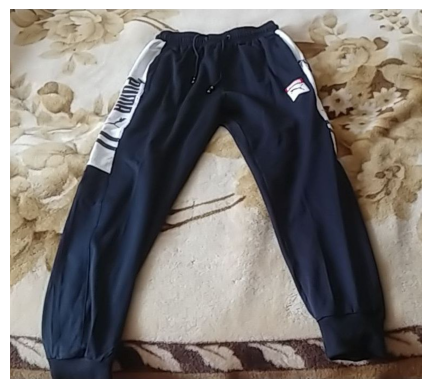

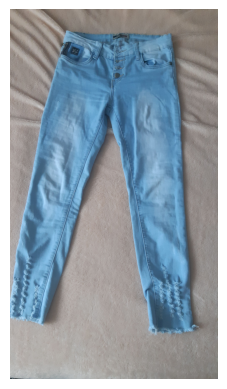

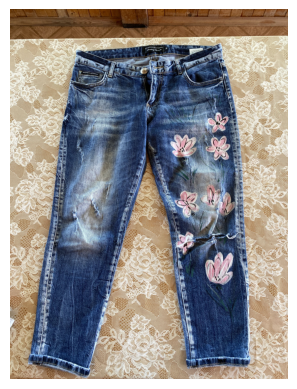

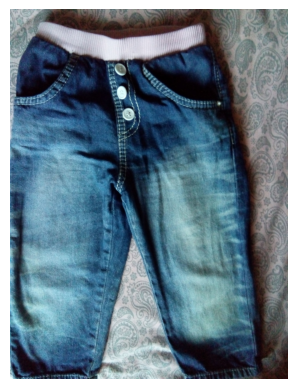

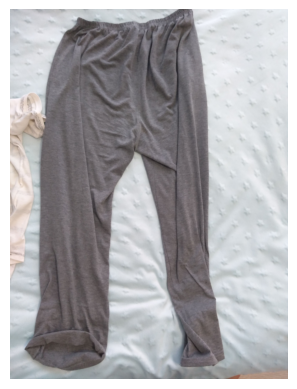

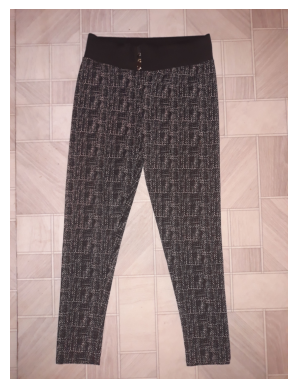

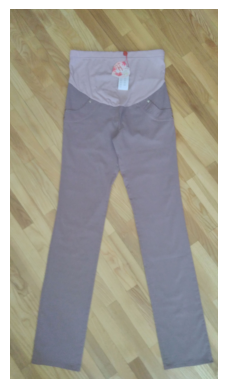

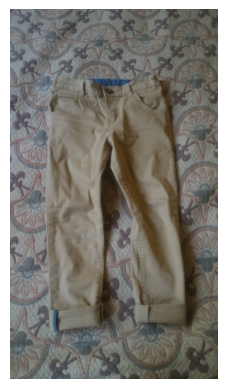

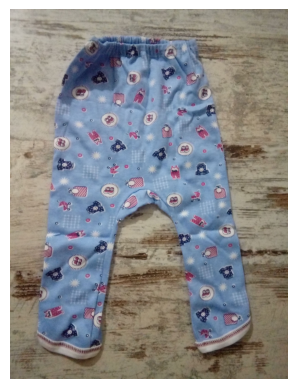

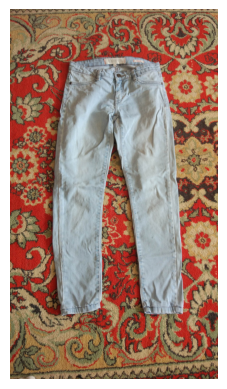

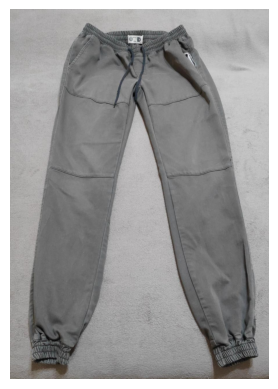

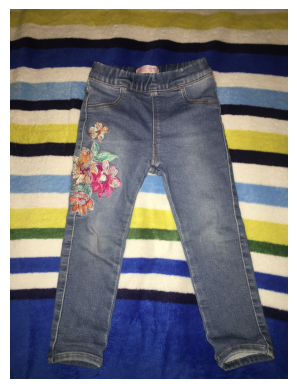

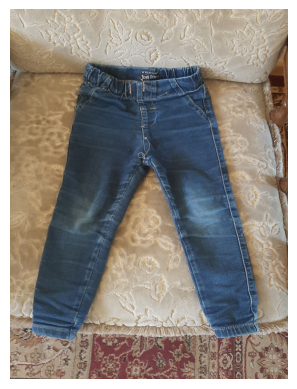

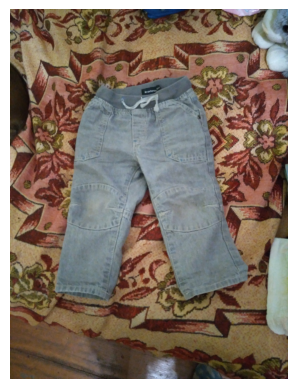

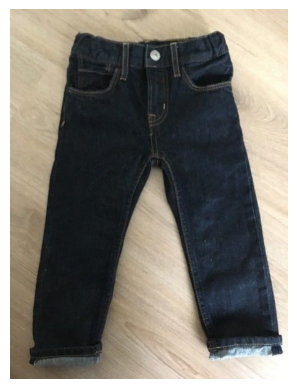

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
source_prefix = '/kaggle/input/clothing-dataset-full/images_original'
for path in l[0:15]:
    img = mpimg.imread(os.path.join(source_prefix,path + '.jpg'))

    # Display the image
    plt.imshow(img)
    plt.axis("off")  # Hide the axes
    plt.show()


In [41]:
clothes['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22
1       ea7b6656-3f84-4eb3-9099-23e623fc1018
2       00627a3f-0477-401c-95eb-92642cbe078d
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0
                        ...                 
5398    dfd4079d-967b-4b3e-8574-fbac11b58103
5399    befa14be-8140-4faf-8061-1039947e329d
5400    5379356a-40ee-4890-b416-2336a7d84061
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59
5402    32b99302-cec7-4dec-adfa-3d4029674209
Name: image, Length: 5403, dtype: object

In [42]:
clothes['label'].value_counts()

label
T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: count, dtype: int64

In [43]:
def get_files(type,df):
    if type == 'summerwear':
        type = 'hoodie'
        df_copy = df[df['label'].str.lower().str.contains(type)]
        type = 'summerwear'
    if type == 'shirt':
        df_copy = df[(df['label'].str.lower().str.contains(type)) & ~(df['label'].str.lower().str.contains('undershirt')) & ~(df['label'].str.lower().str.contains('t-shirt'))]
    else:
        df_copy = df[df['label'].str.lower().str.contains(type)]
    # print(df_copy.shape)
    data =df_copy.sample(n = min(7500,df_copy.shape[0]))
    print(data.shape)
    # Destination folder
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,type)
    
    # Ensure the destination folder exists
    os.makedirs(destination, exist_ok=True)

    source_prefix = '/kaggle/input/clothing-dataset-full/images_original'
    # Move files
    for file in data['image']:
        file = os.path.join(source_prefix, file + '.jpg')
        print(file)
        print(destination)
        shutil.copy(file, destination)

    

In [44]:
types = ["dress", "trousers", "shirt", "shoes", "shorts", "t-shirt", 
              "skirt", "top", "suit", "summerwear", "jeans"]
for t in types:
    get_files(t,clothes)

(357, 4)
/kaggle/input/clothing-dataset-full/images_original/cea1326b-5c4b-4cbb-bb74-cd4c8a2666ef.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/a10eee1b-7361-44c4-9dd8-90e91e083573.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/c7e911d6-833f-4fcb-a81e-4e6145abd3b8.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/58c792f7-57e0-4193-bd4e-6866fae890a0.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/babf31fc-abbe-42d2-9e78-794e8052949e.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/877eebfc-1de1-4009-8362-e289d2891dea.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/4696df2e-9fb4-4f06-bab8-accb2d7e949d.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-full/images_original/5e982004-dc73-41b7-a784-ba316570fc1e.jpg
/kaggle/working/data/dress
/kaggle/input/clothing-dataset-

In [45]:
for t in types:
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,t)
    num_files = len([f for f in os.listdir(destination) if os.path.isfile(os.path.join(destination, f))])
    print(f"Number of files in {type}: {num_files}")

Number of files in jeans: 8472
Number of files in jeans: 8246
Number of files in jeans: 3596
Number of files in jeans: 5950
Number of files in jeans: 4361
Number of files in jeans: 8080
Number of files in jeans: 2940
Number of files in jeans: 9364
Number of files in jeans: 0
Number of files in jeans: 820
Number of files in jeans: 608


## Now we use the Apparel-Dataset

In [46]:
dirs = os.listdir('/kaggle/input/apparel-dataset')

In [47]:
if ('pant' in dirs[1]):
        mathched_category = 'jeans'
print(matched_category)

None


In [48]:
source_dir = '/kaggle/input/apparel-dataset/'
destination_dir = '/kaggle/working/data/'
types = ["dress", "trousers", "shirt", "shoes", "shorts", "t-shirt", 
              "skirt", "top", "suit", "summerwear", "jeans"]

for category in types:
    os.makedirs(os.path.join(destination_dir, category), exist_ok=True)
    # print(os.path.join(destination_dir, category))

# Process each directory
for dir_name in dirs:
    # Find if the directory name contains any type
    if 'hoodie' in dir_name:
        matched_category = 'summerwear'
    if 'pant' in dir_name:
        matched_category = 'jeans'
    if 'shirt' in dir_name:
        matched_category = None
    else:
        matched_category = next((category for category in types if category in dir_name.lower()), None)
    print(matched_category)
    if matched_category:
        source_path = os.path.join(source_dir, dir_name)
        print(source_path)
        # Ensure it's a directory
        if os.path.isdir(source_path):
            # Get list of image files
            image_files = [f for f in os.listdir(source_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

            # Copy images to the matched category
            for img_file in image_files:
                source_img_path = os.path.join(source_path, img_file)
                dest_img_path = os.path.join(destination_dir, matched_category, img_file)

                # Ensure unique filename if it already exists
                counter = 1
                while os.path.exists(dest_img_path):
                    img_name, ext = os.path.splitext(img_file)
                    dest_img_path = os.path.join(destination_dir, matched_category, f"{img_name}_{counter}{ext}")
                    counter += 1

                shutil.copy(source_img_path, dest_img_path)
                # print(f"Copied {source_img_path} to {matched_category}")
        else:
            print(f"Skipping {dir_name}, not a directory.")



skirt
/kaggle/input/apparel-dataset/yellow_skirt
None
suit
/kaggle/input/apparel-dataset/white_suit
None
shoes
/kaggle/input/apparel-dataset/white_shoes
None
shoes
/kaggle/input/apparel-dataset/brown_shoes
None
shoes
/kaggle/input/apparel-dataset/green_shoes
None
shorts
/kaggle/input/apparel-dataset/white_shorts
None
shoes
/kaggle/input/apparel-dataset/blue_shoes
dress
/kaggle/input/apparel-dataset/black_dress
None
None
None
shorts
/kaggle/input/apparel-dataset/black_shorts
suit
/kaggle/input/apparel-dataset/black_suit
shoes
/kaggle/input/apparel-dataset/red_shoes
dress
/kaggle/input/apparel-dataset/yellow_dress
None
shorts
/kaggle/input/apparel-dataset/yellow_shorts
dress
/kaggle/input/apparel-dataset/blue_dress
None
dress
/kaggle/input/apparel-dataset/red_dress
None
None
shoes
/kaggle/input/apparel-dataset/silver_shoes
dress
/kaggle/input/apparel-dataset/white_dress
skirt
/kaggle/input/apparel-dataset/pink_skirt
shorts
/kaggle/input/apparel-dataset/green_shorts
skirt
/kaggle/input/ap

In [49]:
for type in types:
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,type)
    num_files = len([f for f in os.listdir(destination) if os.path.isfile(os.path.join(destination, f))])
    print(f"Number of files in {type}: {num_files}")

Number of files in dress: 11608
Number of files in trousers: 8246
Number of files in shirt: 3596
Number of files in shoes: 9771
Number of files in shorts: 5438
Number of files in t-shirt: 8080
Number of files in skirt: 4223
Number of files in top: 9364
Number of files in suit: 917
Number of files in summerwear: 820
Number of files in jeans: 608


## Finally we will be using the DeepFashion1 dataset

In [50]:
import os
import shutil

# Define source and destination directories
input_dir = "/kaggle/input/deepfashion-inshop-clothes-retrieval/img_highres/"
output_dir = "/kaggle/working/data/"

# Define categories and their corresponding subdirectories
categories = {
    "Denim": "jeans",
    "Pants": "trousers",
    "Jacket_Vests": "summerwear",
    "Sweatshirts_Hoodies": "summerwear",
    "Cardigans": "summerwear",
    "Shorts": "shorts",
    "Skirts": "skirt",
    "Suiting": "suit"
}

# Define filename conditions for movement
conditions = {
    "jeans": ["additional", "flat"],
    "summerwear": ["additional", "flat"],
    "shorts": ["additional", "flat"],
    "skirts": ["additional", "flat"],
    "suits": ["front", "full", "additional","flat"]
}

# Function to generate a unique filename if the file already exists
def get_unique_filename(dest_folder, filename):
    base, ext = os.path.splitext(filename)
    counter = 1
    new_filename = filename
    
    while os.path.exists(os.path.join(dest_folder, new_filename)):
        new_filename = f"{base}_{counter}{ext}"
        counter += 1
    
    return new_filename

# Function to move files based on conditions
def move_files(source_folder, gender):
    for category, dest_folder in categories.items():
        category_path = os.path.join(source_folder, category)
        if os.path.exists(category_path):
            for item in os.listdir(category_path):
                item_path = os.path.join(category_path, item)
                if os.path.isdir(item_path):  # Checking if it is a directory
                    for file in os.listdir(item_path):
                        # Ensure the file has a .jpg extension
                        if file.lower().endswith(".jpg"):
                            src_file = os.path.join(item_path, file)
                            for folder, keywords in conditions.items():
                                if any(keyword in file.lower() for keyword in keywords) and folder == dest_folder:
                                    dest_path = os.path.join(output_dir, folder)
                                    os.makedirs(dest_path, exist_ok=True)

                                    # Generate unique filename if already exists
                                    unique_filename = get_unique_filename(dest_path, file)
                                    shutil.copy(src_file, os.path.join(dest_path, unique_filename))
                                    
                                    # print(f"Copied: {src_file} -> {os.path.join(dest_path, unique_filename)}")

# Process both MEN and WOMEN directories
for gender in ["MEN", "WOMEN"]:
    gender_path = os.path.join(input_dir, gender)
    if os.path.exists(gender_path):
        move_files(gender_path, gender)

print("File copying process completed!")


File copying process completed!


In [51]:
for type in types:
    destination = "/kaggle/working/data/"
    destination = os.path.join(destination,type)
    num_files = len([f for f in os.listdir(destination) if os.path.isfile(os.path.join(destination, f))])
    print(f"Number of files in {type}: {num_files}")

Number of files in dress: 11608
Number of files in trousers: 8246
Number of files in shirt: 3596
Number of files in shoes: 9771
Number of files in shorts: 6445
Number of files in t-shirt: 8080
Number of files in skirt: 4223
Number of files in top: 9364
Number of files in suit: 917
Number of files in summerwear: 1531
Number of files in jeans: 807


In [52]:
# import os
# import shutil
# from IPython.display import FileLink

# # List of all folders to zip and process one by one
# folders = ["dress", "jeans", "shirt", "shoes", "shorts", "skirt",
#            "suit", "summerwear", "t-shirt", "top", "trousers"]

# for folder in folders:
#     folder_path = f"/kaggle/working/data/{folder}"
#     zip_path = f"/kaggle/working/data/{folder}.zip"

#     # Check if the folder exists before proceeding
#     if os.path.exists(folder_path):
#         print(f"\nZipping {folder}...")
#         os.system(f"zip -r {zip_path} {folder_path}")  # Create ZIP file

#         # Generate a download link
#         print(f"\nDownload {folder}.zip:")
#         display(FileLink(zip_path))  # Display link for manual download

#         # Wait for user confirmation before deleting
#         input(f"\nPress Enter after downloading {folder}.zip to delete it and proceed...")

#         # Delete the ZIP file after user confirmation
#         os.remove(zip_path)
#         print(f"\nDeleted {folder}.zip to free up space.")

#     else:
#         print(f"\nSkipping {folder}, not found.")

# print("\nAll folders processed!")


In [53]:
# import os
# import shutil
# from IPython.display import FileLink

# # List of all folders to zip and process one by one
# folders = ["dress", "jeans", "shirt", "shoes", "shorts", "skirt",
#            "suit", "summerwear", "t-shirt", "top", "trousers"]

# for folder in folders:
#     folder_path = f"/kaggle/working/data/{folder}"  # Removed 'data/' from path
#     zip_path = f"/kaggle/working/data/{folder}.zip"  # Save ZIP directly in /kaggle/working/

#     # Check if the folder exists before proceeding
#     if os.path.exists(folder_path):
#         print(f"\nZipping {folder}...")
#         os.system(f"zip -r {zip_path} {folder_path}")  # Create ZIP file

#         # Check if the zip file was actually created
#         if os.path.exists(zip_path):
#             print(f"\nDownload {folder}.zip:")
#             display(FileLink(zip_path))  # Display link for manual download
#         else:
#             print(f"\nError: {zip_path} was not created!")

#         # Wait for user confirmation before deleting
#         input(f"\nPress Enter after downloading {folder}.zip to delete it and proceed...")

#         # Delete the ZIP file after user confirmation
#         os.remove(zip_path)
#         print(f"\nDeleted {folder}.zip to free up space.")

#     else:
#         print(f"\nSkipping {folder}, not found.")

# print("\nAll folders processed!")
